Importing the dataset

In [47]:
import pandas as pd 
from tabulate import tabulate
import matplotlib.pyplot as plt
ori=pd.read_csv("BeverageSalesData.csv")

In [48]:
data=ori.copy()
data.head(2)

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,2020/08/26,376,Kiwi Corner Creations,Canterbury,Christchurch,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905
1,2,2021/06/09,324,Krabi Craftsmarket,Krabi,Ao Nang,8.0376,98.8150,24,Cold Bewerages,...,Vending Machines,D2C,80,80,4560,5,Thailand,48,0.20,720


In [49]:
s=data['Country'].unique()
s

array([' New Zealand ', ' Thailand    ', ' Vietnam     ', ' Brunei      ',
       ' Indonesia   ', ' Australia   ', 'India', ' Singapore   ',
       ' Myanmar     ', ' Philippines ', ' Malaysia    ', ' Cambodia    ',
       ' Laos        ', ' Myanmar   '], dtype=object)

💠 There are 14 distinct Countries engaged in this bevereage business

In [50]:
data.shape

(25000, 29)

💠There are 25k rows and 29 Columns or attribute 

In [51]:
filtered_data = data[data['Country']== 'India'].value_counts()
filtered_data

SrNo   TransactionDate  RetailerId  RetailerName             State      City         Lat        Long       ProductItemID  Category        Brand         Product         PackagingType  PackagingQty  PackagingCategory  PackagingQty_N_ml  MRP_UnitPrice  Product_Launch_Date  IsNewProduct  SalesChannel                            ChannelType    OrderQty  OrderQty_N  SalesValue  Discount  Country  CostPerUnit  MarginPercentage  Profit
9      2020/08/03       131         CityKolkataPoint131      Kolkata    West Bengal  16.631722  96.319782  25             Cold Bewerages  Coca_Cola     Diet Coke       Cans           180ml         Regular            180                30             1992/07/30           Running       E-Commerce                              Online         150       150         4140        8         India    26           0.15              315       1
16547  2021/10/17       112         FreshKolkataPoint112     Kolkata    West Bengal  10.238653  92.754118  135            Cold Bewera

In [52]:
data[data['Country']=='India']['State'].unique()

array(['Kolkata', 'Jaipur', 'Chennai', 'Mumbai', 'Delhi', 'Surat',
       'Ahmedabad', 'Hyderabad', 'Pune', 'Bangalore'], dtype=object)

In [53]:
data['State'], data['City'] = data['City'], data['State']
data[data['Country']=='India']['State'].unique()

array(['West Bengal', 'Rajasthan', 'Tamil Nadu', 'Maharashtra', 'Delhi',
       'Gujarat', 'Telangana', 'Karnataka'], dtype=object)

Correction ☑️: State and City values were previously interchanged. It is rectified now.

In [54]:
filtered_data = data[data['Country']== 'India'].value_counts()
filtered_data

SrNo   TransactionDate  RetailerId  RetailerName             State        City       Lat        Long       ProductItemID  Category        Brand         Product         PackagingType  PackagingQty  PackagingCategory  PackagingQty_N_ml  MRP_UnitPrice  Product_Launch_Date  IsNewProduct  SalesChannel                            ChannelType    OrderQty  OrderQty_N  SalesValue  Discount  Country  CostPerUnit  MarginPercentage  Profit
9      2020/08/03       131         CityKolkataPoint131      West Bengal  Kolkata    16.631722  96.319782  25             Cold Bewerages  Coca_Cola     Diet Coke       Cans           180ml         Regular            180                30             1992/07/30           Running       E-Commerce                              Online         150       150         4140        8         India    26           0.15              315       1
16547  2021/10/17       112         FreshKolkataPoint112     West Bengal  Kolkata    10.238653  92.754118  135            Cold Bewera

In [55]:
data.head(2)

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,2020/08/26,376,Kiwi Corner Creations,Christchurch,Canterbury,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905
1,2,2021/06/09,324,Krabi Craftsmarket,Ao Nang,Krabi,8.0376,98.8150,24,Cold Bewerages,...,Vending Machines,D2C,80,80,4560,5,Thailand,48,0.20,720


In [56]:
market_demand=data['OrderQty'].sum()
market_demand/1000000

6.312262

💠 Total units sold:6312262

6.3 Million Units sold

In [57]:
data.groupby('Country')['SalesValue'].sum()

Country
 Australia       28956153
 Brunei          28754511
 Cambodia         5629527
 Indonesia       27754741
 Laos             6170424
 Malaysia        27366670
 Myanmar          8479343
 Myanmar         20180367
 New Zealand     27896882
 Philippines     28936590
 Singapore       21798987
 Thailand        22780626
 Vietnam         27733122
India            83971956
Name: SalesValue, dtype: int64

In [58]:
data['SalesValue'].sum()

366409899

💠 Total sales amount:💲366.4 M

In [59]:
data.groupby('SalesChannel')['SalesValue'].sum()

SalesChannel
Airline and Travel Catering                33605616
Club and Mass Merchandisers                32900190
E-Commerce                                 32876797
Event Sponsorship and Marketing Tie-Ins    35460025
Food Service and On-Premise                33395924
Hotels and Hospitality                     30616183
Retail Stores                              33367147
Sports Arenas and Entertainment Venues     32348701
Vending Machines                           32821492
Wholesale Distributors                     33771921
Workplaces and Offices                     35245903
Name: SalesValue, dtype: int64

Event Sponsorship and Marketing Tie-Ins has the highest sales, amounting to 35.46 million.

Event Sponsorship and Marketing Tie-Ins and Workplaces and Offices lead with the highest sales figures.

Wholesale Distributors, Airline and Travel Catering, and Food Service and On-Premise show strong performance.

Hotels and Hospitality has the lowest sales, highlighting a potential area for growth.







In [60]:
data.groupby('Category')['SalesValue'].sum()

Category
Cold Bewerages    317440879
Hot Bewerages      48969020
Name: SalesValue, dtype: int64

Cold Beverages 💲317.44 million boasts the highest sales across all categories.

In [61]:
data.groupby('ChannelType')["SalesValue"].sum()

ChannelType
D2C              167749219
General Trade    132883693
Modern Trade      32900190
Online            32876797
Name: SalesValue, dtype: int64


Observations:

- D2C leads with significant sales, surpassing the second-highest channel (General Trade) by approximately 💲34.87 million.
- General Trade follows, trailing behind D2C but still maintaining a considerable lead over Modern Trade and Online channels.
- Modern Trade and Online channels have almost identical sales figures, with Modern Trade slightly ahead by  💲0.13 million. Both channels, however, have significantly lower sales compared to D2C and General Trade.

In [62]:
india_data=data[data['Country']=='India']
state_wise_sales=india_data.groupby('State')['SalesValue'].sum().reset_index()
state_wise_sales.columns=['State','TotalSalesvalue']
state_wise_sales

,State,TotalSalesvalue
0,Delhi,9093237
1,Gujarat,16906250
2,Karnataka,6475240
3,Maharashtra,21842475
4,Rajasthan,11484490
5,Tamil Nadu,3336561
6,Telangana,4130361
7,West Bengal,10703342


Maharashtra leads with the highest sales value(21.84 M), indicating a strong market presence.

Gujarat and Rajasthan also show significant sales figures, highlighting their importance in the market.

Tamil Nadu has the lowest sales value(3.34 M), suggesting potential opportunities for growth and market expansion.

In [63]:
data.head(2)

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,2020/08/26,376,Kiwi Corner Creations,Christchurch,Canterbury,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905
1,2,2021/06/09,324,Krabi Craftsmarket,Ao Nang,Krabi,8.0376,98.8150,24,Cold Bewerages,...,Vending Machines,D2C,80,80,4560,5,Thailand,48,0.20,720


In [64]:
data['RetailerName'].nunique()

288

In [65]:
data['Brand'].value_counts()

Coca_Cola              4050
Fanta                  2984
Sprite                 2678
Limca                  2629
Maaza                  2400
RimZim                 1951
Thums Up               1518
Minute Maid            1332
Kinley Soda            1084
Georgia                1083
Schweppes               827
Kinley                  807
Costa Coffee            790
Charged by Thums Up     340
Honest Tea              340
Smartwater              187
Name: Brand, dtype: int64

💠 Coca-Cola stands out as the top-selling product with 4,050 units sold, indicating strong consumer preference for this brand

In [66]:
popular_brand_by_country=india_data.groupby('Brand')['SalesValue'].sum().reset_index()

popular_brand_by_country

,Brand,SalesValue
0,Charged by Thums Up,907108
1,Coca_Cola,11785275
2,Costa Coffee,6128739
3,Fanta,7877701
4,Georgia,9230333
5,Honest Tea,457835
6,Kinley,5912224
7,Kinley Soda,3618489
8,Limca,7251977
9,Maaza,5851227


In India Coca-Cola leads with 11,785,275 units sold, indicating strong consumer demand and market dominance.


#Top 10 countries by sales 

In [67]:
country_sales=data.groupby('Country')['SalesValue'].sum().reset_index()
country_sales=country_sales.sort_values(by='SalesValue',ascending=False)
top_10_countries=country_sales.head(10)
top_10_countries

,Country,SalesValue
13,India,83971956
0,Australia,28956153
9,Philippines,28936590
1,Brunei,28754511
8,New Zealand,27896882
3,Indonesia,27754741
12,Vietnam,27733122
5,Malaysia,27366670
11,Thailand,22780626
10,Singapore,21798987


India: Sales of $ 83.97 million , contributing approximately 50.3% to the total sales.



In [68]:
brand_sales=data.groupby('Brand')['SalesValue'].sum().reset_index()
brand_sales=brand_sales.sort_values(by='SalesValue',ascending=False)
top_10_brands=brand_sales.head(10)
top_10_brands

,Brand,SalesValue
1,Coca_Cola,48527482
4,Georgia,38211962
3,Fanta,37241956
8,Limca,33822917
14,Sprite,32497449
11,RimZim,27559545
2,Costa Coffee,27098336
6,Kinley,25212764
9,Maaza,24554173
10,Minute Maid,22902910


Top Performers:

Coca-Cola: Leads with sales of 48.53 million, capturing 23.3% of total brand sales.

Georgia: Follows with 38.21 million, representing 18.4% of total sales.

Fanta: Holds 37.24 million in sales, accounting for 18.0% of total brand sales.

In [69]:
data.head(2)

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,2020/08/26,376,Kiwi Corner Creations,Christchurch,Canterbury,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905
1,2,2021/06/09,324,Krabi Craftsmarket,Ao Nang,Krabi,8.0376,98.8150,24,Cold Bewerages,...,Vending Machines,D2C,80,80,4560,5,Thailand,48,0.20,720


Correlation between Cost per unit and Total Sales0.706951571391643


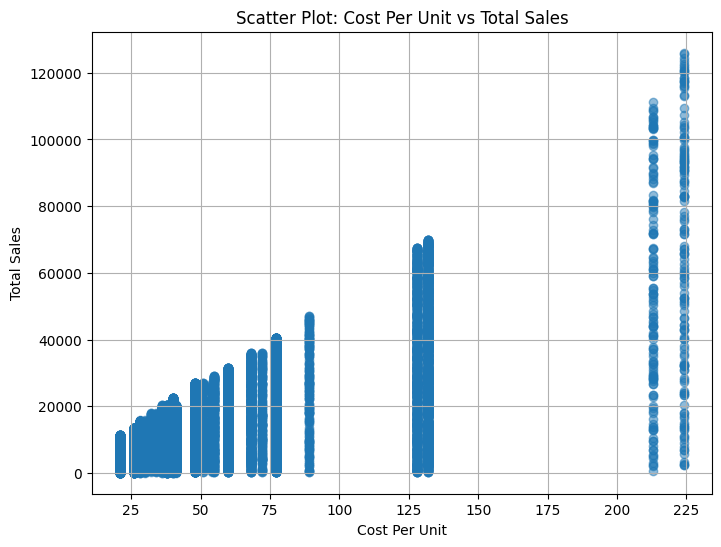

In [70]:
correlation=data['CostPerUnit'].corr(data['SalesValue'])
print(f"Correlation between Cost per unit and Total Sales{correlation}")
plt.figure(figsize=(8,6))
plt.scatter(data['CostPerUnit'],data['SalesValue'],alpha=0.5)
plt.title('Scatter Plot: Cost Per Unit vs Total Sales')
plt.xlabel('Cost Per Unit')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [71]:
data['PackagingType'].value_counts()

PET           14535
Cans           4972
RGB            2481
Custom         1873
TETRAPACKS     1139
Name: PackagingType, dtype: int64

Total profit by package Type in India

In [72]:
india_data.groupby('PackagingType')['Profit'].sum().reset_index()


,PackagingType,Profit
0,Cans,861806
1,Custom,929345
2,PET,3445789
3,RGB,286411
4,TETRAPACKS,258363


In [73]:
data.head(1)

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,2020/08/26,376,Kiwi Corner Creations,Christchurch,Canterbury,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905


In [74]:
# Group by 'OrderQty' and 'SalesChannel', then sum 'Profit'
sales_channel = data.groupby(['OrderQty', 'SalesChannel'])['Profit'].sum().reset_index()

top_10=sales_channel.sort_values(by='Profit',ascending=False)

top_10.head(10)


,OrderQty,SalesChannel,Profit
2622,478,Hotels and Hospitality,42783
2631,480,Event Sponsorship and Marketing Tie-Ins,36480
1807,330,Event Sponsorship and Marketing Tie-Ins,35643
2296,418,Vending Machines,35531
2557,466,Retail Stores,34603
2385,434,Workplaces and Offices,34398
2526,460,Vending Machines,33695
2309,420,Workplaces and Offices,32655
2197,400,Vending Machines,32200
2734,498,Sports Arenas and Entertainment Venues,31749


In [75]:
data['SalesChannel'].value_counts()

Event Sponsorship and Marketing Tie-Ins    2374
Workplaces and Offices                     2368
E-Commerce                                 2313
Wholesale Distributors                     2309
Airline and Travel Catering                2295
Retail Stores                              2289
Food Service and On-Premise                2251
Vending Machines                           2236
Sports Arenas and Entertainment Venues     2218
Hotels and Hospitality                     2181
Club and Mass Merchandisers                2166
Name: SalesChannel, dtype: int64

In [76]:


# Assuming 'data' is your DataFrame
result = data.groupby('SalesChannel').agg({
    'OrderQty': 'sum',
    'Profit': 'sum'
}).reset_index()

print(result)


                               SalesChannel  OrderQty   Profit
0               Airline and Travel Catering    580314  2289381
1               Club and Mass Merchandisers    544082  2236612
2                                E-Commerce    569238  2302810
3   Event Sponsorship and Marketing Tie-Ins    601768  2452782
4               Food Service and On-Premise    564812  2263988
5                    Hotels and Hospitality    544300  2104772
6                             Retail Stores    581298  2299893
7    Sports Arenas and Entertainment Venues    561014  2227478
8                          Vending Machines    567476  2276082
9                    Wholesale Distributors    585804  2330993
10                   Workplaces and Offices    612156  2446556


### Insights:

- Total Order Quantity: 6,809,262 units
- Total Profit:** $24,524,347

- Top Performers:
  - **Workplaces and Offices:** 
    - Order Quantity: 612,156 units (9%)
    - Profit: $2,446,556 (10%)
  - **Event Sponsorship and Marketing Tie-Ins:** 
    - Profit: $2,452,782 (10%)

- Significant Contributors:**
  - Retail Stores:** 
    - Order Quantity: 581,298 units (8.5%)
    - Profit: $2,299,893 (9.4%)
  - E-Commerce:
    - Order Quantity: 569,238 units (8.4%)
    - Profit: $2,302,810 (9.4%)

- Moderate Performers:
  - Food Service and On-Premise:**
    - Order Quantity: 564,812 units (8.3%)
    - Profit: $2,263,988 (9.2%)

- Areas for Improvement:
  - **Hotels and Hospitality:** 
    - Order Quantity: 544,300 units (8%)
    - Profit: $2,104,772 (8.6%)

### Summary:
Focus on top performers like "Workplaces and Offices" and "Event Sponsorship and Marketing Tie-Ins" for higher returns. Moderate channels show potential for targeted growth strategies.

discount impact

In [77]:
average_discount=data['Discount'].mean()
correlation_discount_sales=data['Discount'].corr(data['SalesValue'])
correlation_discount_profit=data['Discount'].corr(data['Profit'])
print(f"Average Discount:{average_discount}")
print(f"Correlation between Discount and Sales Value:{correlation_discount_sales}")
print(f"Correlation between Discount and Profit:{correlation_discount_profit}")


Average Discount:8.16368
Correlation between Discount and Sales Value:0.44650690241986013
Correlation between Discount and Profit:0.3384192472392123


Discounts are effective: The moderate positive correlations with both sales value and profit suggest that discounting is a useful strategy for increasing overall sales and maintaining profitability.


Strategic Discounting: Given the stronger correlation with sales value, consider using discounts as a tool for driving higher sales volumes, which can subsequently lead to increased profits.

Market Penetration rate

In [78]:
new_product=data[data['IsNewProduct']==True]
sum_orderQty_for_new_product=new_product['OrderQty'].sum()
sum_OrderQty_all_product=data['OrderQty'].sum()
percentage_new_products=(sum_orderQty_for_new_product/sum_OrderQty_all_product)*100
print(f"Percentage of Order Qunatity of new Product:{percentage_new_products:.2f}%")

Percentage of Order Qunatity of new Product:0.00%


The 0.00% indicates that new products are not significantly contributing to the total order quantity.

Product mix diversity

In [79]:
distinct_product_count=data['ProductItemID'].nunique()
sum_orderQty_per_product=data.groupby('ProductItemID')['OrderQty'].sum().reset_index()
print(f"Count of distinct productItemId:{distinct_product_count}")
print(f"Order Quantity per ProductItemID:{sum_orderQty_per_product}")


Count of distinct productItemId:153
Order Quantity per ProductItemID:     ProductItemID  OrderQty
0                1     41278
1                2     46906
2                3     42374
3                4     41952
4                5     43448
..             ...       ...
148            149     36548
149            150     27336
150            151     43724
151            152     40778
152            153     45410

[153 rows x 2 columns]


In [80]:
data[data['ProductItemID']=='2']

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit


In [81]:
data.head(2)

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,2020/08/26,376,Kiwi Corner Creations,Christchurch,Canterbury,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905
1,2,2021/06/09,324,Krabi Craftsmarket,Ao Nang,Krabi,8.0376,98.8150,24,Cold Bewerages,...,Vending Machines,D2C,80,80,4560,5,Thailand,48,0.20,720


In [82]:


correlations_per_brand = data.groupby(['Brand']).apply(lambda x: x['CostPerUnit'].corr(x['SalesValue']))

correlations_df = pd.DataFrame(correlations_per_brand, columns=['Correlation'])

print("Correlation between Cost Per Unit and Sales Value for Each Brand:")
print(correlations_df)


Correlation between Cost Per Unit and Sales Value for Each Brand:
                     Correlation
Brand                           
Charged by Thums Up     0.244677
Coca_Cola               0.646293
Costa Coffee                 NaN
Fanta                   0.699928
Georgia                      NaN
Honest Tea                   NaN
Kinley                  0.725953
Kinley Soda             0.404734
Limca                   0.620308
Maaza                   0.576728
Minute Maid             0.229483
RimZim                  0.693782
Schweppes                    NaN
Smartwater                   NaN
Sprite                  0.632954
Thums Up                0.705924


Brand such as :

Coca-Cola
Fanta
Limca
Kinley
Rimzim
Sprite
Thumps-up

are generating high sales with low cost per unit

Brand such as:

Costa-Coffee
Honest-Tea
Schweppes  
Smartwater

performing badly despite their very low cost per unit.

In [83]:
import socket
socket.gethostname()

'LAPTOP-IKLQS1NQ'

In [84]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [87]:
import sqlalchemy,pyodbc
conn=sqlalchemy.create_engine(f'mssql+pyodbc://LAPTOP-IKLQS1NQ\SQLEXPRESS/master?trusted_connection=yes&driver=ODBC Driver 17 for SQL Server'
)
data.to_sql("BeverageSales",con=conn,if_exists="replace",index=False)


16